## Introduction
Tennis is an international sport that has sparked a massive following and given rise to several prominent figures who have paved the way for the future success of the game. Arguably one of the most important precursors to one’s success in tennis is their ability to serve. While the competitive nature of tennis often results in long, drawn-out rallies, players are able to score easy points simply through their serving tactics. If a player is able to complete several successful serves, or aces, that their opponent is unable to counterattack, they may quickly find themselves with the upperhand in the game. Whilst much of the logistics behind serving comes from well-thought and practiced approaches, our group was curious as to how much luck can also play into a successful serve. Our group wishes to explore the correlation between successful serves and natural ability by asking the question -  “Based off the number of winner aces, winner service points, and their overall rank/position, what could the winning player's height be in a given tennis match?” The dataset we will be using to answer our predictive question is titled Game Results for Top 500 Players from 2017-2019, which comes from  https://github.com/JeffSackmann/tennis_atp.

## Methods

To answer our question of identifying the height of the winning tennis player that corresponds to different serving statistics, our first and foremost task was to determine the columns in the original dataset that would be appropriate to our analysis. Given that we wished to predict height, choosing the "winner_ht" column was a given, however, some of the other columns required more careful thought. We selected the "w_ace" and "w_svpt" columns as winner aces and serving points factor into our desire to form the basis of height prediction around serving statistics. We also selected the "winner_rank" column to account for the overall success of the player. Initially, we had chosen the "winner_ioc" column as well, as we thought it would be interesting to see if nationality had any relevance to our central question. However, after analyzing the "winner_ioc" column, we established that some countries had a poor representation in the data and, as a result, if we were to include nationality in our predictions, we would have imbalanced statistics. Once we had narrowed our variables down to consist of the "w_ace", "winner_ht", and "w_svpt" columns, we began the process of cleaning + wrangling our data by ensuring our data had any "N/A" values filtered out. Then it was necessary to establish whether or not a relationship existed between the variables we had chosen and the column we wished to predict; to do this, we formulated scatterplots that plotted each variable against winner_ht. For variables such as "w_ace," there was somewhat of a positive linear relationship present with height, however, for "winner_rank" and "w_svpt," the relationship was not as clear. Due to the variations in relationships, we decided to perform both knn regression and linear regression and compare the models to see which would produce a lower RMSE, i.e, had a lower margin of error. Since our resources for performing multivariable visualizations in regards to regression are slim, we will opt to create three separate visualizations for both knn and linear regression to account for each of the variables we are using to predict. After assessing both models, we would compare their results and visualizations and ultimately decide which would be preferable for future analysis. 

### Load Libraries

To begin, we must load the libraries necessary to complete our code. Some of the standard libraries we are loading include: "tidyverse" as a general set, "cowplot" for improving the plots, "scales" for scaling in the visualizations and "tidymodels" for modelling. 

In [6]:
library(tidyverse)
library(cowplot)
library(scales)
library(tidymodels)

### Read Data into R

Using the read_csv function, we will read the Tennis Data into R and assign the output of this function to the name "tennis_data".

In [7]:
tennis_data <- read_csv('https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn')
head(tennis_data)

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275


###### Figure 0.1

### Extract our variables 
Using the select function, we will extract the following columns: winner_ht, w_ace, w_svpt, w_SvGms. These columns will give us useful information regarding the service data, such as the number of aces, service points, and service games. It is also important to remember to select the height column as that is ultimately the variable we wish to predict. Next, we will filter each column using !is.na to remove any unneeded N/A values that may appear in our data. The output of select and filter will be assigned the name "useful_col"

In [8]:
#choose the data that we think have a relation to serving
useful_col <- select(tennis_data, winner_ht, w_ace, w_svpt, winner_ioc,winner_rank)|>
filter(!is.na(winner_ht))|>
filter(!is.na(w_ace))|>
filter(!is.na(w_svpt))|>
filter(!is.na(winner_ioc))|>
filter(!is.na(winner_rank))

head(useful_col)



winner_ht,w_ace,w_svpt,winner_ioc,winner_rank
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
178,3,77,JPN,9
178,2,47,JPN,9
188,12,68,FRA,239
188,10,94,FRA,40
178,5,59,JPN,9
188,11,64,FRA,239


###### Figure 0.2

### Check the Number of Players from Each Nation:
Based on the initial table, it was pretty clear that there wasn’t an equal representation from all countries, as some countries had more players than others. This would affect our predictive analysis and off-balance our results. Hence, we checked the number of players from each country to see if it would make sense to take the player's nationality into account.

In [13]:
#analyze the nations column
nofnation<- useful_col|>
group_by(winner_ioc)|>
summarize(n=n())

nofnation



winner_ioc,n
<chr>,<int>
ARG,337
AUS,165
AUT,140
BEL,129
BIH,67
BRA,20
BUL,87
CAN,95
COL,6


###### Figure 0.3

### Select new variables

From the data table above it is clear that our predictions would be wrong given the disproportionate distribution of representation. Therefore, we didn’t take player nationality into account and only take winner_ht, w_ace, w_svpt and winner_rank into account. The columns are selected and assigned to an object named "tennis".


In [14]:
#we cut the win_ioc, here is the final data we use

tennis<- select(useful_col, winner_ht, w_ace, w_svpt, winner_rank)

head(tennis)


winner_ht,w_ace,w_svpt,winner_rank
<dbl>,<dbl>,<dbl>,<dbl>
178,3,77,9
178,2,47,9
188,12,68,239
188,10,94,40
178,5,59,9
188,11,64,239


###### Figure 0.4

### Double-checking our columns
Over here, we use the summarize function and calculate the average for each column just to verify whether there are any N/A values left, upon which we find that there are no N/A values left, thereby ensuring no interference with our analysis in that regard.

In [17]:
#find average to makesure there is no NA.
summarize(tennis,
          mean_w_ht = mean(winner_ht),
          mean_w_ace = mean(w_ace),
          mean_w_svpt = mean(w_svpt),
          mean_winner_rank = mean (winner_rank))

mean_w_ht,mean_w_ace,mean_w_svpt,mean_winner_rank
<dbl>,<dbl>,<dbl>,<dbl>
186.5634,7.576781,79.75114,46.85207


###### Figure 0.5

### Visualize the existing relationship between the variables

To determine if there is a relationship present between our variables and the height column we have created three scatterplots. The first scatterplot showcases the number of winner aces plotted against the winner's height, the second shows the winner's rank plotted against the winner's height, and the third shows the winner's rank plotted against height. 

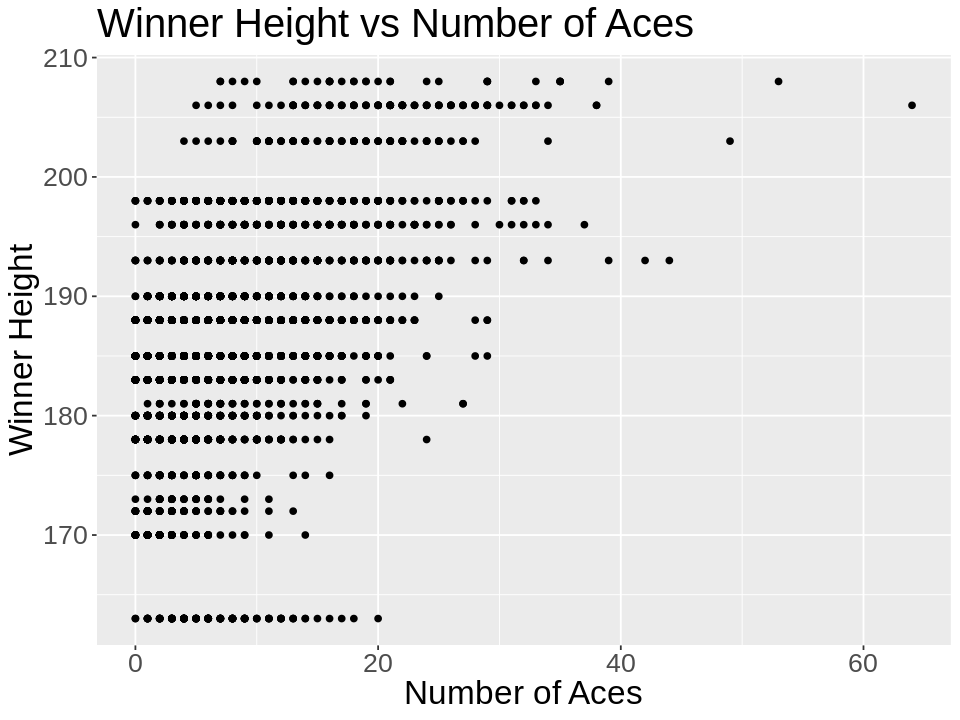

In [12]:
#plot for wi_ace & winner_ht
options(repr.plot.width = 8, repr.plot.height = 6)

ace_vs_ht<- ggplot(tennis, aes(x = w_ace, y = winner_ht)) +
  geom_point() +
  xlab("Number of Aces") +
  ylab("Winner Height") + 
    ggtitle("Winner Height vs Number of Aces") +
  theme(text = element_text(size = 20))
ace_vs_ht

###### Figure 0.6

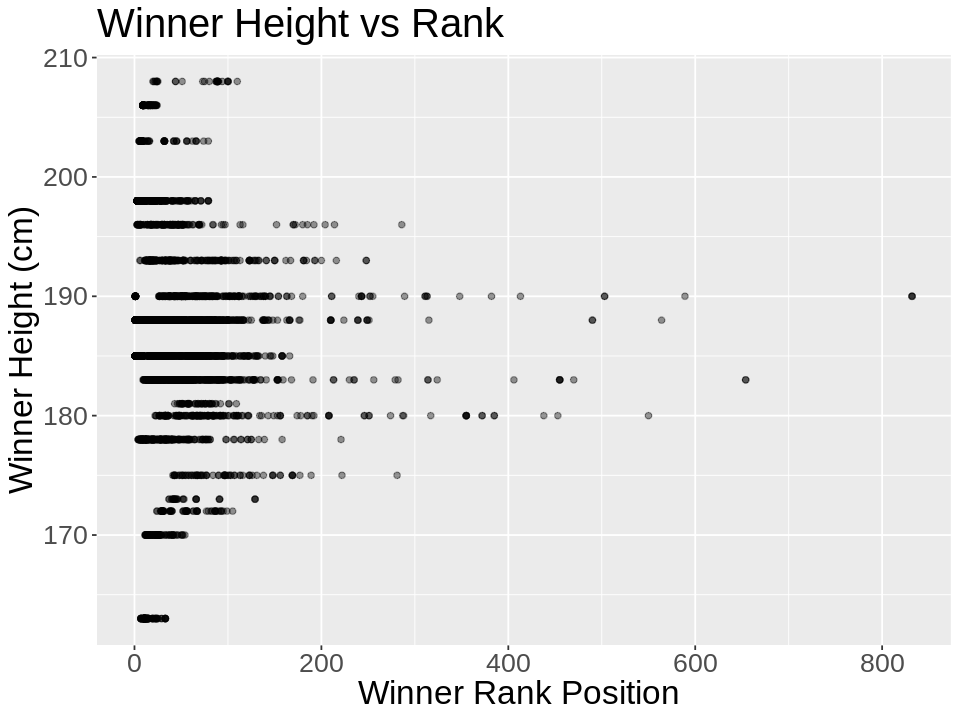

In [69]:
#plot for winner_rank & winner_ht

rank_vs_ht<- ggplot(tennis, aes(x = winner_rank, y = winner_ht)) +
  geom_point(alpha = 0.4) +
  xlab("Winner Rank Position ") +
  ylab("Winner Height (cm)") + 
    ggtitle("Winner Height vs Rank") +
  theme(text = element_text(size = 20))
rank_vs_ht

###### Figure 0.7

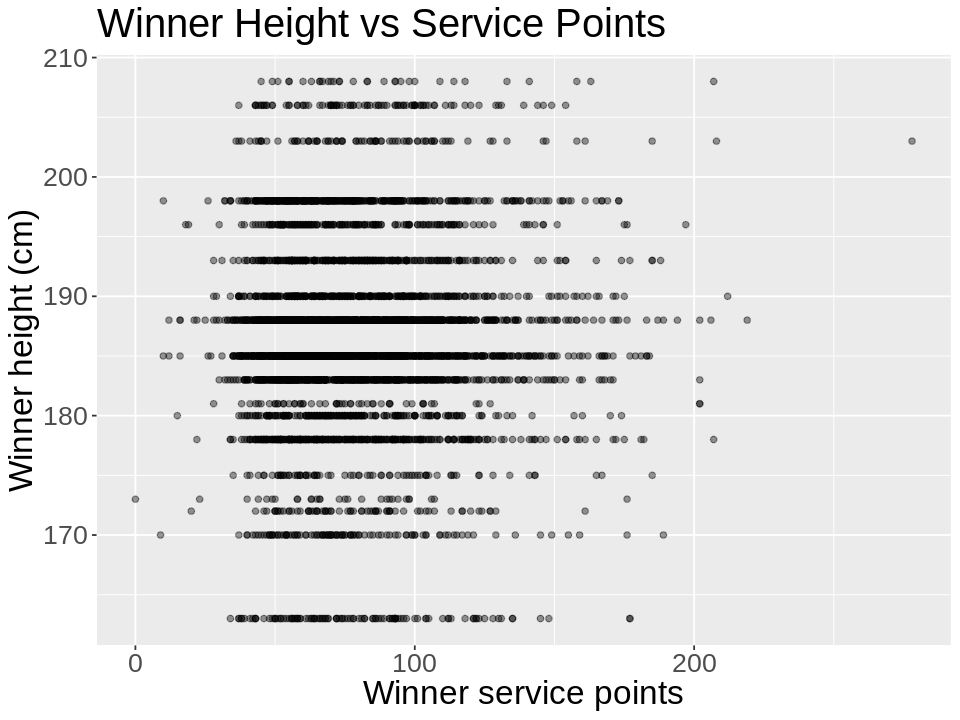

In [70]:
#plot for w_svpt & winner_ht

service_points_vs_ht<- ggplot(tennis, aes(x = w_svpt, y = winner_ht)) +
  geom_point(alpha = 0.4) +
  xlab("Winner service points") +
  ylab("Winner height (cm)") + 
    ggtitle("Winner Height vs Service Points") +
  theme(text = element_text(size = 20))
service_points_vs_ht

###### Figure 0.8

### Split the data
To begin we will split the tennis data into separate testing and training components, using 75% of the training data. We will name the initial data split, “tennis_split” and specify the strata as "winner_ht" as that is the column we wish to predict. The output of the testing data will be assigned the name "tennis_test" and the output of the training data will be assigned the name "tennis_train"

In [16]:
set.seed(1234)


#split the data into training and testing components

tennis_split <- initial_split(tennis, prop = 0.75, strata = winner_ht)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split) 

### Cross validation
Using our training data, we will run cross-validation and identify the lowest RMSPE. To do this we will perform a cross validation with 10 folds using the vfold_cv function and setting the strata as "winner_ht". This information will be stored as "tennis_vfold"

We will then create our recipe specifying the variables we wish to use for the regression (w_ace, w_svpt, and winner_rank). Furthermore we will employ the step_scale and step_center functions to ensure our data is balanced. Our recipe will be named "tennis_recipe". 

Next, we will create a model specification for the K-nearest neighbors classification by using the nearest_neighbor() function. We will specify that we want to set neighbors = tune(), and use the straight-line distance. Additionally, we will specify "kknn" for training the model with the set_engine() function. Finally, we will identify that this is a regression problem with the set_mode() function. The output of this will be named "knn_spec".


In [72]:
set.seed(3234)

#use cross validation to choose k

#create vfold, recipe and tune the model

tennis_vfold <- vfold_cv(tennis_train, v = 10, strata = winner_ht)



tennis_recipe <- recipe(winner_ht ~ w_ace+w_svpt+winner_rank, data = tennis_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())



knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")


tennis_recipe
knn_spec


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


### Find the best K

Now, let's use the RMSPE to find the best setting for k. Below we will test 50 values of k. First, we create a tibble with a column called neighbors that contains a sequence of values, 1 to 50. The tibble is assigned to an object called "gridvals". 

We will then create a workflow consisting of the tennis_recipe and knn_spec. Next, we will tune our workflow so that it tests all the values specified in our gridvals object, and resamples using your cross-validation data set. Finally, we collect the statistics from the model. The output of the above instructions is assigned to the object “knn_result”.

Now find the minimum RMSPE, which will help us identify the optimal number of neighbors. We will use the filter function to extract the RMSE and display the first row of data which is arranged by the mean. We will name this object "knn_min".

In [73]:
set.seed(2134)

#find the best k

gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

knn_result <- workflow()|>
add_recipe(tennis_recipe)|>
add_model(knn_spec)|>
tune_grid(resamples = tennis_vfold, grid = gridvals)|>
collect_metrics()

knn_min <- knn_result |>
   filter(.metric == "rmse") |>
   arrange(mean) |> 
   head(1)

knn_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
35,rmse,standard,6.995212,10,0.09380976,Preprocessor1_Model35


###### Figure 0.9

### Create the model
Using the filter function we extract the minimum RMSPE to find the best setting for the number of neighbors, we will then pull the number of neighbors and assign the object to "k_min".

Next, using the same settings as before, we will recreate our model speculation, except this time we will set the neighbors argument to be equal to "k_min" (which is what we named the value for our ideal number of neighbors). The output of this will be named "tennis_best_spec".

In [74]:
set.seed(2020)
#create the model

k_min <- knn_min |>
         pull(neighbors)

tennis_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

tennis_best_spec


K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = k_min
  weight_func = rectangular

Computational engine: kknn 


### Fit the model

Now we will create a workflow that incorporates the recipe we had made earlier, tennis_recipe as well as the model speculation we created above, tennis_best_spec. Then we proceed to use the fit function to fit this data to our training data, tennis_train. This new workflow will be assigned the name "tennis_best_fit".

Then, we will use predict to make predictions on the test data set as well as use the metric function again to analyze the overall summary of the quality of our regression. We will use both the predict and bind_cols functions on our test data and within our metrics function set the truth to be "winner_ht" as that is the column we wish to predict. The output of this code is assigned the name "tennis_summary".


In [75]:
set.seed(1334)
#fit the model and get rmse for knn
tennis_best_fit <- workflow() |>
         add_recipe(tennis_recipe) |>
         add_model(tennis_best_spec) |>
         fit(data = tennis_train)

tennis_summary <- tennis_best_fit |>
          predict(tennis_test) |>
          bind_cols(tennis_test) |>
          metrics(truth = winner_ht, estimate = .pred)

tennis_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,7.0659308
rsq,standard,0.2418679
mae,standard,5.2105042


###### Figure 1.0

### Create a visualization

Next, we create scatterplots with each variable plotted against the winner's height from test_preds. The predictions are shown as a blue line over the data points.

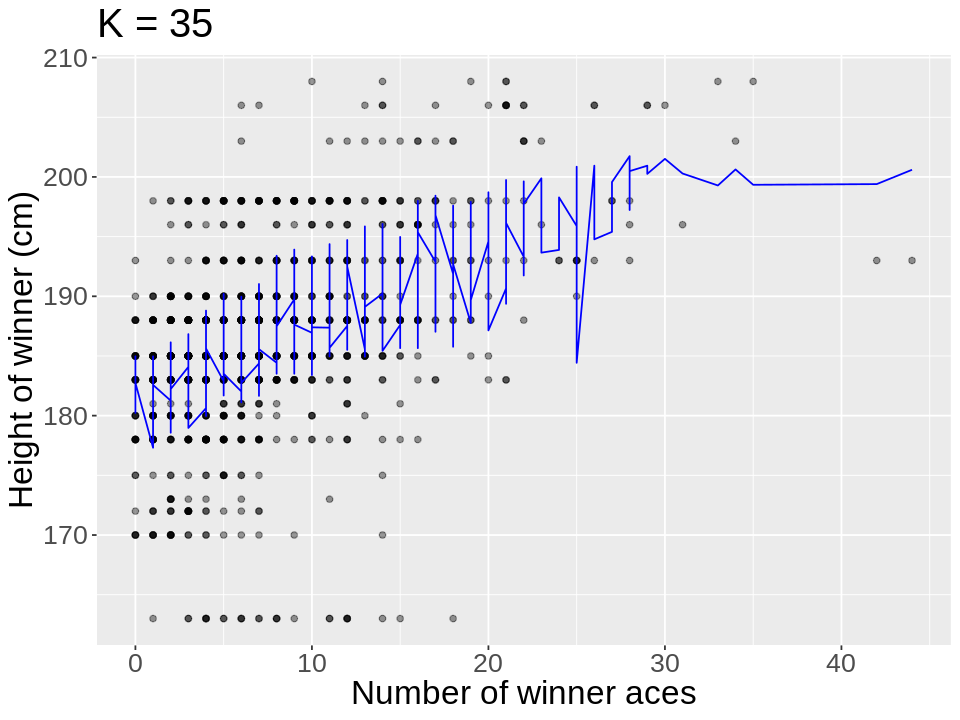

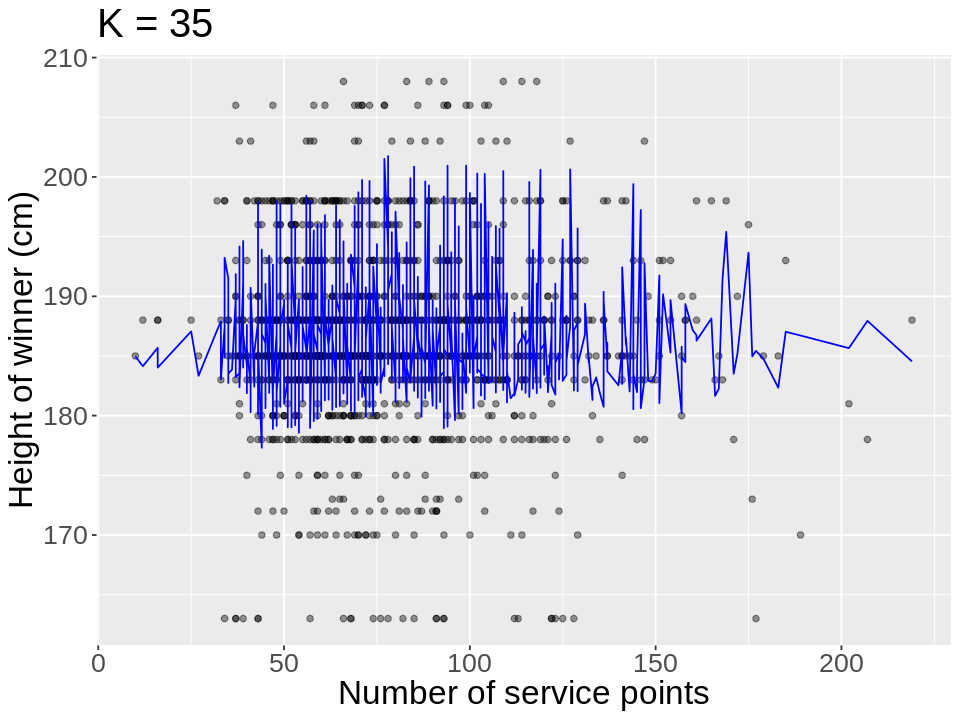

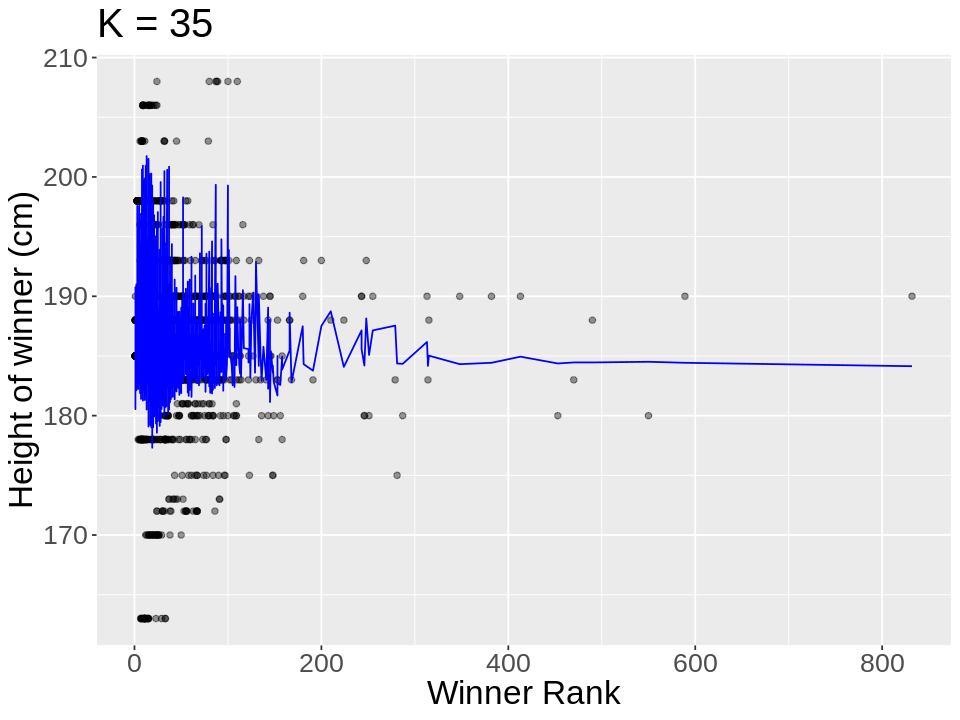

In [87]:
#plot to show result of knn on w_ace versus winner_ht for test data


test_preds <- tennis_best_fit |>
  predict(tennis_test) |>
  bind_cols(tennis_test)

plot_final <- ggplot(test_preds, aes(x = w_ace, y = winner_ht)) +
  geom_point(alpha = 0.4) +
  geom_line(data = test_preds, 
            mapping = aes(x = w_ace, y = .pred), 
            color = "blue") +
  xlab("Number of winner aces") +
  ylab("Height of winner (cm)") +
  ggtitle(paste0("K = ",k_min)) + 
  theme(text = element_text(size = 20))
plot_final

plot_final_2 <- ggplot(test_preds, aes(x = w_svpt, y = winner_ht)) +
  geom_point(alpha = 0.4) +
  geom_line(data = test_preds, 
            mapping = aes(x = w_svpt, y = .pred), 
            color = "blue") +
  xlab("Number of service points") +
  ylab("Height of winner (cm)") +
  ggtitle(paste0("K = ",k_min)) + 
  theme(text = element_text(size = 20))
plot_final_2

plot_final_3 <- ggplot(test_preds, aes(x = winner_rank, y = winner_ht)) +
  geom_point(alpha = 0.4) +
  geom_line(data = test_preds, 
            mapping = aes(x = winner_rank, y = .pred), 
            color = "blue") +
  xlab("Winner Rank") +
  ylab("Height of winner (cm)") +
  ggtitle(paste0("K = ",k_min)) + 
  theme(text = element_text(size = 20))
plot_final_3

###### Figures 1.1 - 1.3

### Linear Regression
Using the tennis_train data that we created earlier, we will create a recipe that specifies the variables we wish to use for regression; w_ace, w_svpt, and winner_rank. The recipe is assigned to the object "tennis_recipe_l".

The next step is to build a linear regression model specification. We will be using the linear_reg function and in the set_engine function, we set "lm" as the engine. Finally, we set "regression" as the mode. The output is named "lm_spec".

In [77]:
set.seed(1234)

# Begin Linear Regression by creating the recipe and linear model

tennis_recipe_l <- recipe(winner_ht ~ w_ace+w_svpt+winner_rank, data = tennis_train)


lm_spec <- linear_reg()|>
set_engine("lm")|>
set_mode("regression")

tennis_recipe_l
lm_spec

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Linear Regression Model Specification (regression)

Computational engine: lm 


### Fit the model

Then, we create a workflow analysis that consists of our model specification and recipe. We then fit the workflow to the training dataset, tennis_train. The ouput is assigned to an object named "lm_fit".

In [78]:
set.seed(1345)
#fit the model

lm_fit <- workflow() |>
         add_recipe(tennis_recipe_l) |>
         add_model(lm_spec) |>
         fit(data = tennis_train)
lm_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)        w_ace       w_svpt  winner_rank  
 185.034491     0.736119    -0.048169    -0.004861  


### Finding the RMSE

To find the RMSE, we first use lm_fit to make predictions on the test data. We use both the predict and bind_cols functions on our tennis_test data and proceed to collect the metrics. We specify the truth to be equal to "winner_ht" as that is the variable we wish to predict and store the output of our code to an object called lm_mult_test_results.


In [18]:
#find rmspe for linear regression

lm_mult_test_results <- lm_fit |>
  predict(tennis_test) |>
  bind_cols(tennis_test) |>
  metrics(truth = winner_ht, estimate = .pred)
lm_mult_test_results



ERROR: Error in predict(lm_fit, tennis_test): object 'lm_fit' not found


###### Figure 1.4

### Visualize the final Linear Regression Models

Next, we create a scatterplot with the winner statistics against the winner's height. The first scatterplot depicts the number of winner aces against the winner's height using the data from tennis_test. The second scatterplot is a representation of the winner's height vs their rank. The third plot visualizes the winner's service points plotted against height. The predictions are shown as a blue line over the data points. 

`geom_smooth()` using formula 'y ~ x'



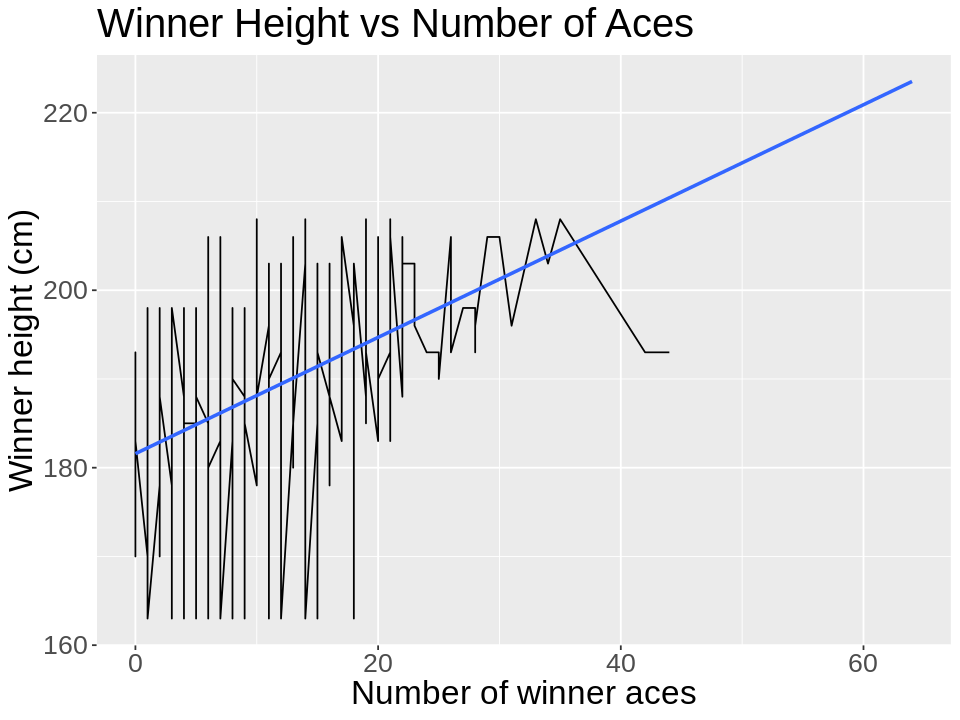

In [80]:
#Visualize the linear regression model
 lm_predictions_test <- tennis_test |>
     ggplot(aes(x = w_ace, y = winner_ht)) +
         geom_line(aes(x=w_ace, y = winner_ht)) +
         geom_smooth(data=tennis_train,aes(x = w_ace, y = winner_ht),method = "lm", se = FALSE) +
         xlab("Number of winner aces") +
         ylab("Winner height (cm)") +
        ggtitle("Winner Height vs Number of Aces") +
        theme(text = element_text(size = 20))
lm_predictions_test


###### Figure 1.5

`geom_smooth()` using formula 'y ~ x'



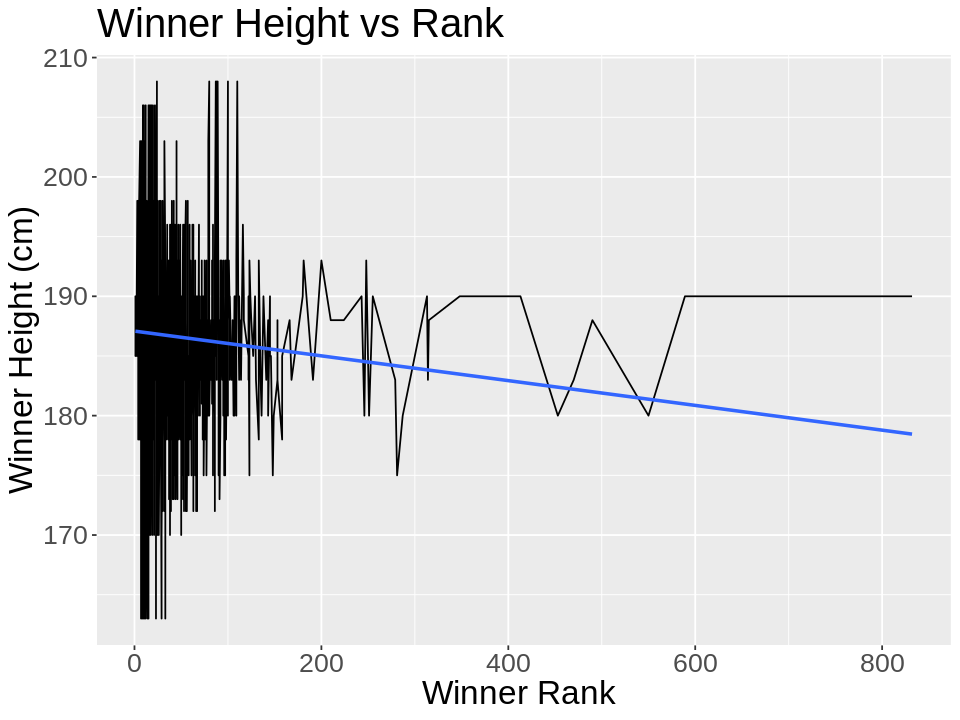

In [82]:
 lm_predictions_test_2 <- tennis_test |>
     ggplot(aes(x = winner_rank, y = winner_ht)) +
         geom_line(aes(x=winner_rank, y = winner_ht)) +
         geom_smooth(data=tennis_train,aes(x = winner_rank, y = winner_ht),method = "lm", se = FALSE) +
         xlab("Winner Rank ") +
         ylab("Winner Height (cm)") +
        ggtitle("Winner Height vs Rank") +
        theme(text = element_text(size = 20))
lm_predictions_test_2

###### Figure 1.6

`geom_smooth()` using formula 'y ~ x'



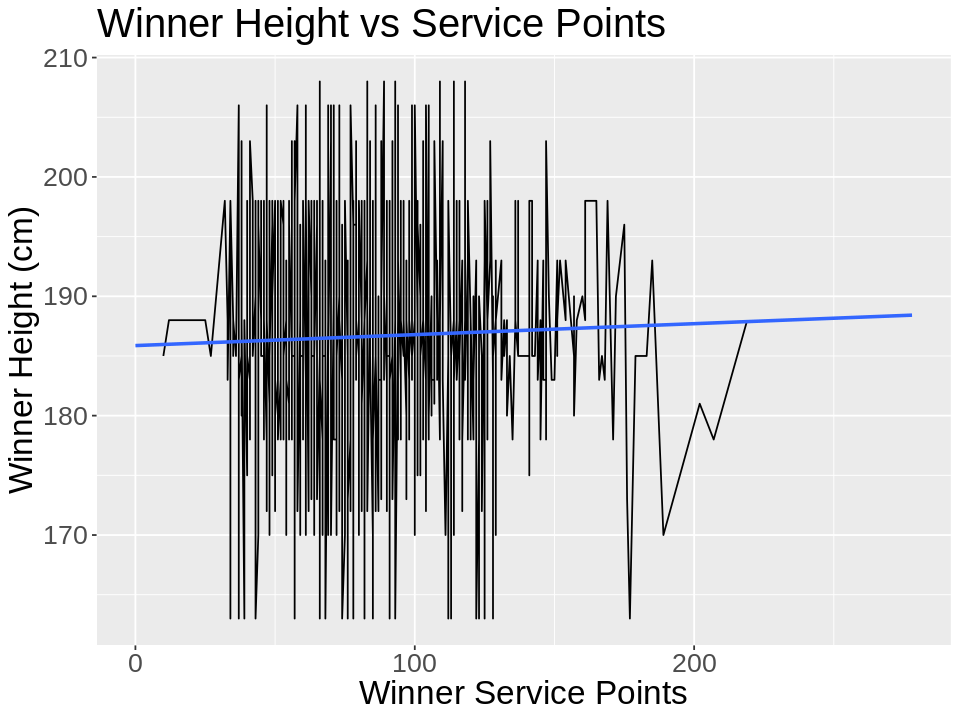

In [84]:
lm_predictions_test_3 <- tennis_test |>
     ggplot(aes(x = w_svpt, y = winner_ht)) +
         geom_line(aes(x=w_svpt, y = winner_ht)) +
         geom_smooth(data=tennis_train,aes(x = w_svpt, y = winner_ht),method = "lm", se = FALSE) +
         xlab("Winner Service Points") +
         ylab("Winner Height (cm)") +
        ggtitle("Winner Height vs Service Points") +
        theme(text = element_text(size = 20))
lm_predictions_test_3

###### Figure 1.7

## Discussion

Ultimately we found that height does in fact play a significant role in a tennis player’s rank and the number of aces they score. Surprisingly however, the relationship between service points and the winner’s height was not clear for the top 500 players in the years between 2017 and 2019. Both the knn model and linear regression model effectively worked on predicting the height though the knn seemed to be the more ideal one. The knn model showed a trend pattern which was more intuitive than the linear prediction of the linear regression model. In both cases, the height was higher when the player hit more aces and when the player’s rank was numerically lower. However, the predictions in both models weren’t clear when it came to service points. This means that though aces contribute to service points, a huge portion of service points was lost, given effective returns and continuous rallies. Furthermore, the height somehow, though intuitively contrary, didn’t lead to a higher number of service points. This means that though height leads to a better chance of winning service games, given the higher potential of aces, it does not have to be a huge contributor to winning service points if the services are returned. 

Our analysis could play a major role in helping tennis elites and coaches around the world. With the knowledge that taller players tend to be more successful in serving, coaches could better prepare their athletes for matches. If a player knows they are playing in a tournament against a taller player they could work to better adapt their reponse to serves in order to counterattack their opponent's natural strength. Our results could also lead to future questions about how height determines the rest of a player’s game after the service as well as how height contributes to service game wins if the first serve does not go in. We could also explore the relationship height plays in success in sports outside of tennis. 

## References

Bieniek, Pawel. Body Height and Career Win Percentage in Relation to Serve and Return Games Effectiveness in Elite Tennis Players. Sept. 2014, https://www.researchgate.net/publication/277721035_Body_height_and_career_win_percentage_in_relation_to_serve_and_return_games_effectiveness_in_elite_tennis_players. 

Söğüt, Mustafa. Stature: Does It Really Make a Difference in Match-Play Outcomes among ... 2018, https://www.tandfonline.com/doi/abs/10.1080/24748668.2018.1466259. 



#### Figure Legend
###### Figure 0.1 - Raw tennis data
###### Figure 0.2 - Extracting winner height, winner aces, winner service points, winner nationality
###### Figure 0.3 - Number of times the country appears in data
###### Figure 0.4 - Extracting winner height, winner aces, winner service points
###### Figure 0.5 - Mean for each column to ensure no N/A values
###### Figure 0.6 - Winner Aces plotted against Winner Height
###### Figure 0.7 -  Winner Rank plotted against Winner Height
###### Figure 0.8 - Winner Service Points plotted against Winner Height
###### Figure 0.9 - Table containing information for # of neighbors
###### Figure 1.0 - Table containing RMSE
###### Figure 1.1 - Number of aces plotted against winner height using 35 neighbors
###### Figure 1.2 - Number of service points plotted against winner height using 35 neighbors
###### Figure 1.3 - Player rank plotted against winner height using 35 neighbors
###### Figure 1.4 - Table containing RMSPE
###### Figure 1.5 - Number of aces plotted against winner height
###### Figure 1.6 - Winner rank plotted against winner height
###### Figure 1.7 - Service points plotted against winner height